# Project4 - Twitter Sentiment Analysis (NLP)

In [162]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as  plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

## [1] Loading Dataset

In [163]:
df = pd.read_csv(r"J:\Courses\Top Mentor\Class Notes\Day 36 (Sept 17) - Tableau and Major projects\Project files\Project4 (Twitter Sentiment Analysis)- NLP & RNN\Sentiment.csv")
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [164]:
#finding data shape
df.shape

(13871, 21)

In [165]:
#checking duplicate values
df.isnull().sum()

id                               0
candidate                       96
candidate_confidence             0
relevant_yn                      0
relevant_yn_confidence           0
sentiment                        0
sentiment_confidence             0
subject_matter                 326
subject_matter_confidence        0
candidate_gold               13843
name                             0
relevant_yn_gold             13839
retweet_count                    0
sentiment_gold               13856
subject_matter_gold          13853
text                             0
tweet_coord                  13850
tweet_created                    0
tweet_id                         0
tweet_location                3912
user_timezone                 4403
dtype: int64

In [166]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [167]:
# Since, we are focused on finding sentiments in Twitter in this project so we can consider only 2 columns which are 
# sentiment and text to train and test, other columns can be dropped/ignored which are not useful 

In [168]:
df = df[['sentiment','text']]
df.head()

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [169]:
# Checking null values
df.isnull().sum()

sentiment    0
text         0
dtype: int64

In [170]:
# There are no null values so we can proceed with further steps

## [2] Split the data 

In [171]:
# Give independent data to x & dependent data to y
x = df.iloc[:,-1]                     # independent (all rows, last column)
y = df.iloc[:,0]                      # dependent   (all rows, 1st column)

In [172]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.1 , random_state=11)
# test_size indicates percentage of values for test i.e, 10% Data = Test & 90% Data = Train

In [173]:
x_train.head()

9690     RT @RWSurferGirl: I think Cruz and Trump need ...
251      All #GOP candidates want to reduce taxes while...
13172    I hate when they call Social Security an entit...
6738     RT @BNLieb: By smearing opponents of #WhiteGen...
10542    RT @PuestoLoco: .@AnnTBush @OnlyTruthReign\nCa...
Name: text, dtype: object

In [174]:
training_data= pd.concat([x_train, y_train],axis=1)      #concat x train and y train
training_data.head()                                     #checking first 5 rows

,text,sentiment
9690,RT @RWSurferGirl: I think Cruz and Trump need ...,Positive
251,All #GOP candidates want to reduce taxes while...,Negative
13172,I hate when they call Social Security an entit...,Negative
6738,RT @BNLieb: By smearing opponents of #WhiteGen...,Negative
10542,RT @PuestoLoco: .@AnnTBush @OnlyTruthReign\nCa...,Negative


In [175]:
testing_data= pd.concat([x_test, y_test],axis=1)          #concat x test and y test 
testing_data.head()                                       #checking first 5 rows

,text,sentiment
767,RT @RedStateJake: Looking for a new candidate ...,Neutral
2062,Giving credit where it's due: I thought all th...,Positive
13862,"RT @RWSurferGirl: Trump has got it right, nobo...",Positive
1121,The winner of last night's debate was @Hillary...,Negative
10915,LOL Cruz wasn't allowed to jump in on that com...,Negative


## [3] EDA

In [176]:
training_data['sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

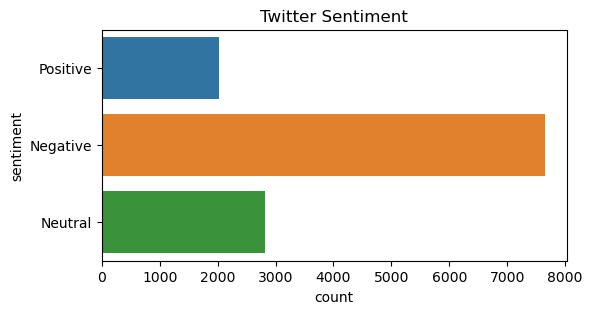

In [177]:
plt.figure(figsize = (6,3))
sns.countplot(y="sentiment", data=training_data)
plt.title("Twitter Sentiment")
plt.show()

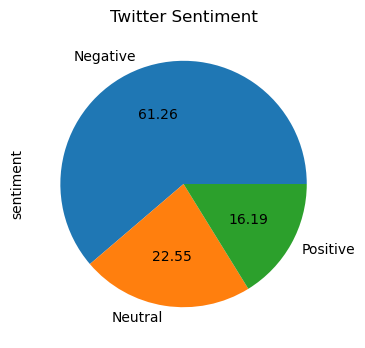

In [178]:
plt.figure(figsize = (4,4))
training_data["sentiment"].value_counts().plot(kind="pie", autopct="%1.2f")
plt.title("Twitter Sentiment")
plt.show()

Positive words


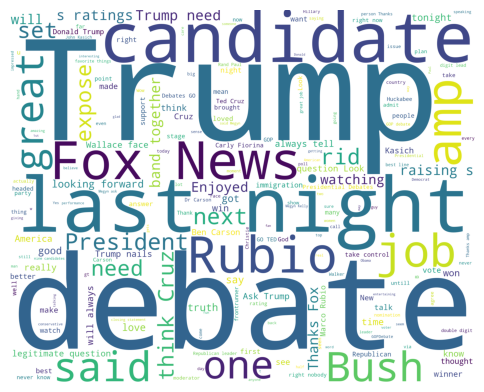

Neutral words


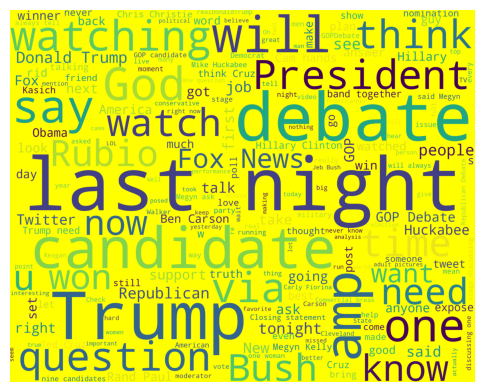

Negative words


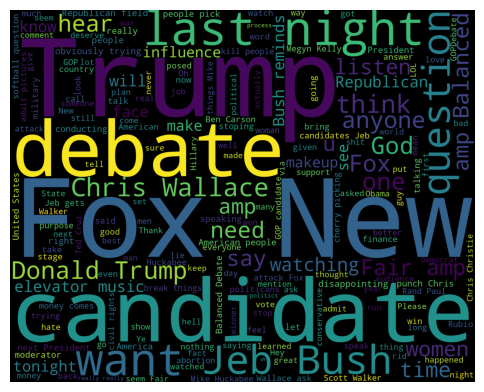

In [179]:
from wordcloud import WordCloud,STOPWORDS

train_pos = training_data[training_data['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neu = training_data[training_data['sentiment'] == 'Neutral']
train_neu = train_neu['text']
train_neg = training_data[training_data['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(6,6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Neutral words")
wordcloud_draw(train_neu, 'yellow')
print("Negative words")
wordcloud_draw(train_neg, 'black')

## [4] Preprocessing

In [180]:
import nltk
import sklearn 

In [181]:
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [182]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### Remove Stopwards and apply lemitization

##### Train Data

In [183]:
# Lemmatization
import re 
def clean_text_wnl(text):
    # Remove non-alphanumeric characters and convert to lowercase
    cleaned_text = re.sub("[^a-zA-Z0-9]", ' ', text).lower()
    
    # Tokenize the text into words
    words = cleaned_text.split()
    
    # Stem the words and remove stopwords
    stemmed_words = [wnl.lemmatize(word) for word in words if word not in stopwords.words("english")]
    
    # Join the stemmed words back into a single string
    cleaned_text_wnl = ' '.join(stemmed_words)
    
    return cleaned_text_wnl

In [184]:
training_data['Cleaned_text_wnl'] = training_data['text'].apply(clean_text_wnl)
training_data.head()

,text,sentiment,Cleaned_text_wnl
9690,RT @RWSurferGirl: I think Cruz and Trump need ...,Positive,rt rwsurfergirl think cruz trump need band tog...
251,All #GOP candidates want to reduce taxes while...,Negative,gop candidate want reduce tax huckabee want le...
13172,I hate when they call Social Security an entit...,Negative,hate call social security entitlement governme...
6738,RT @BNLieb: By smearing opponents of #WhiteGen...,Negative,rt bnlieb smearing opponent whitegenocide nazi...
10542,RT @PuestoLoco: .@AnnTBush @OnlyTruthReign\nCa...,Negative,rt puestoloco anntbush onlytruthreign cancel p...


In [185]:
# dropping original column

In [186]:
training_data = training_data.drop(['text'],axis = 1)
training_data.head()

,sentiment,Cleaned_text_wnl
9690,Positive,rt rwsurfergirl think cruz trump need band tog...
251,Negative,gop candidate want reduce tax huckabee want le...
13172,Negative,hate call social security entitlement governme...
6738,Negative,rt bnlieb smearing opponent whitegenocide nazi...
10542,Negative,rt puestoloco anntbush onlytruthreign cancel p...


##### Test Data

In [187]:
testing_data['Cleaned_text_wnl'] = testing_data['text'].apply(clean_text_wnl)
testing_data.head()

,text,sentiment,Cleaned_text_wnl
767,RT @RedStateJake: Looking for a new candidate ...,Neutral,rt redstatejake looking new candidate support ...
2062,Giving credit where it's due: I thought all th...,Positive,giving credit due thought three gopdebate mode...
13862,"RT @RWSurferGirl: Trump has got it right, nobo...",Positive,rt rwsurfergirl trump got right nobody would t...
1121,The winner of last night's debate was @Hillary...,Negative,winner last night debate hillaryclinton loser ...
10915,LOL Cruz wasn't allowed to jump in on that com...,Negative,lol cruz allowed jump comment christie made go...


In [188]:
testing_data = testing_data.drop(['text'],axis = 1)
testing_data.head()

,sentiment,Cleaned_text_wnl
767,Neutral,rt redstatejake looking new candidate support ...
2062,Positive,giving credit due thought three gopdebate mode...
13862,Positive,rt rwsurfergirl trump got right nobody would t...
1121,Negative,winner last night debate hillaryclinton loser ...
10915,Negative,lol cruz allowed jump comment christie made go...


## [5] Converting categorical data to numerical data

#### Using Label encoding method for dependent var to convert from cat to num data (dependent var)

In [210]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
training_data["sentiment"]=le.fit_transform(training_data["sentiment"])        #fit and tranform the data 
training_data.head()

,sentiment,Cleaned_text_wnl
9690,2,rt rwsurfergirl think cruz trump need band tog...
251,0,gop candidate want reduce tax huckabee want le...
13172,0,hate call social security entitlement governme...
6738,0,rt bnlieb smearing opponent whitegenocide nazi...
10542,0,rt puestoloco anntbush onlytruthreign cancel p...


In [191]:
training_data["sentiment"].unique()

array([2, 0, 1])

In [211]:
# for test data (fit and tranform the data)
testing_data["sentiment"]=le.transform(testing_data["sentiment"]) 
testing_data.head()

,sentiment,Cleaned_text_wnl
767,1,rt redstatejake looking new candidate support ...
2062,2,giving credit due thought three gopdebate mode...
13862,2,rt rwsurfergirl trump got right nobody would t...
1121,0,winner last night debate hillaryclinton loser ...
10915,0,lol cruz allowed jump comment christie made go...


#### Converting categorical data into numerical data using CountVectorizer (independent var)

In [193]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train_final = cv.fit_transform(training_data["Cleaned_text_wnl"]).toarray()
x_train_final

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [194]:
x_train_final.shape

(12483, 16212)

In [195]:
y_train_final= training_data["sentiment"].values
y_train_final.shape

(12483,)

In [199]:
#### with test data
x_test_final = cv.transform(testing_data["Cleaned_text_wnl"]).toarray()
x_test_final.shape

(1388, 16212)

In [200]:
y_test_final= testing_data["sentiment"].values
y_test_final.shape

(1388,)

## [6] Model Development

In [201]:
# Giving data to Naive-bayes algorithm to train and build model

from sklearn.naive_bayes import MultinomialNB
ml = MultinomialNB()
ml.fit(x_train_final,y_train_final)

MultinomialNB()

In [202]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [203]:
ml.score(x_train_final,y_train_final)

0.8120644075943283

In [204]:
ml.score(x_test_final,y_test_final)

0.69164265129683

## [7] Testing Real Data

In [205]:
pro=list(le.classes_)                #extract classes
pro

['Negative', 'Neutral', 'Positive']

In [218]:
#creating a function for profile prediction for test data
def predict(sentence):
    li=[]                                           #creating a empty list
    profiles = list(le.classes_)                    #extract job profile name
    clean_sentence= clean_text_wnl(sentence)      #call the textpreprocess function for cleaning the text and store into the new variable
    li.append(clean_sentence)                       #append the cleaning data into empty list
    s = cv.transform(li).toarray()                  #convert to numerical data and into array
    num = ml.predict(s)[0]                         #use model for prediction
    return profiles[num]                            #return profile name 

In [226]:
b = "RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfFâ€¦"
predict(b)

2

In [227]:
c = "RT @CarolCNN: #DonaldTrump under fire for comments about women @PeterBeinart @SL_Schaeffer @IWF @@MyRkiger weigh in on #GOPdebate http://t.â€¦"
predict(c)

0

In [228]:
d = "RT @itsashlyperez: listening to fetty wap while packing because i'm a true american #GOPDebate #doesthishashtagexpire?"
predict(d)

1

## [8] Save data

In [222]:
import pickle
with open('Twitter Sentiment.pkl','wb') as f:
    pickle.dump(ml, f)

In [223]:
model = pickle.load(open('Twitter Sentiment.pkl' , 'rb'))

In [224]:
a = ['RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate']
b = cv.transform(a).toarray()

In [225]:
model.predict(b)

array([0])